In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.isnull().sum()
df = df.dropna(subset=['Cuisines', 'City', 'Aggregate rating', 'Price range'])
df.reset_index(drop=True, inplace=True)

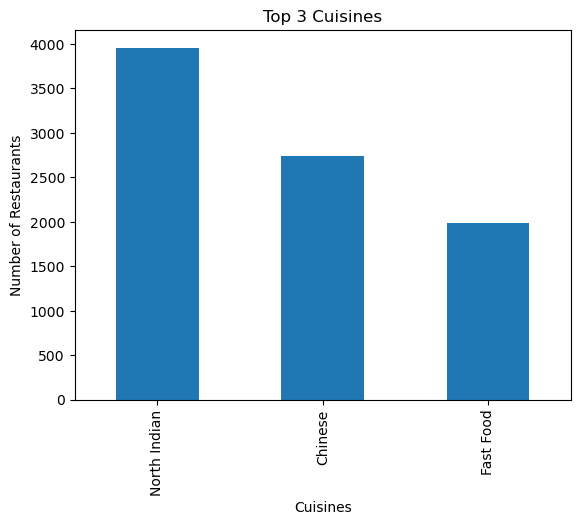

In [5]:
cuisines = df['Cuisines'].str.split(', ').explode()
top_cuisines = cuisines.value_counts().head(3)
top_cuisines

(total_restaurants := len(df))
(top_cuisines / total_restaurants) * 100

top_cuisines.plot(kind='bar', title='Top 3 Cuisines')
plt.ylabel("Number of Restaurants")
plt.show()


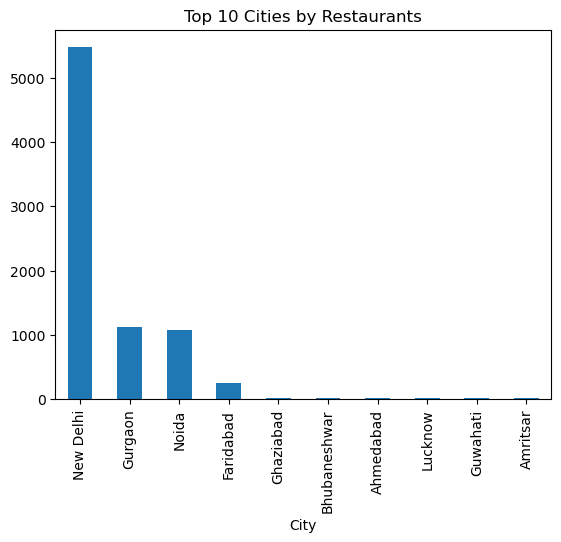

In [6]:
city_count = df['City'].value_counts()
city_avg_rating = df.groupby('City')['Aggregate rating'].mean()

city_count.head()
city_avg_rating.sort_values(ascending=False).head

city_count.head(10).plot(kind='bar', title='Top 10 Cities by Restaurants')
plt.show()





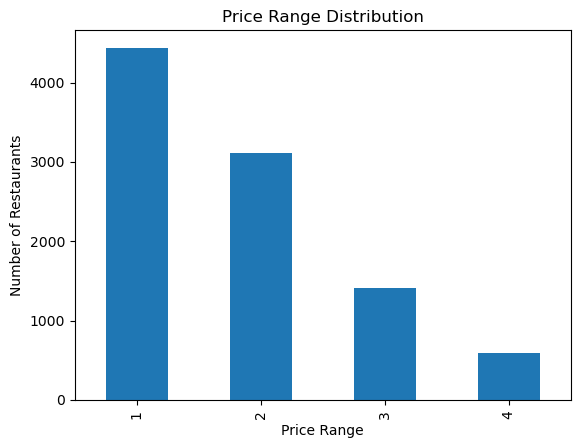

In [7]:
price_dist = df['Price range'].value_counts().sort_index()
price_dist

(price_dist / total_restaurants) * 100

price_dist.plot(kind='bar', title='Price Range Distribution')
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()


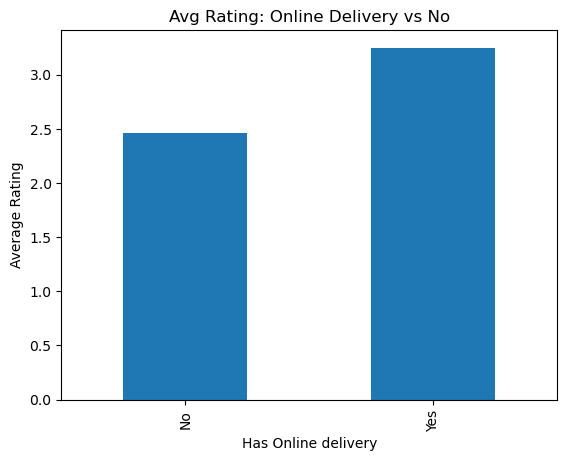

In [8]:
online_delivery = df['Has Online delivery'].value_counts(normalize=True) * 100
online_delivery


delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
delivery_rating

delivery_rating.plot(kind='bar', title='Avg Rating: Online Delivery vs No')
plt.ylabel("Average Rating")
plt.show()


## Insights & Conclusion

1. The top three most common cuisines in the dataset are North Indian, Chinese, and Fast Food.
2. The city with the highest number of restaurants is New Delhi.
3. Restaurants that offer online delivery have a higher average rating compared to those that do not.
4. Most restaurants fall under price range 1.
